In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# t-SNE

def compute_pairwise_affinities(X, perplexity=30.0):
    n, d = X.shape
    D = np.square(X[:, None] - X[None, :]).sum(axis=2)
    P = np.zeros((n, n))
    for i in range(n):
        betas = 1.0
        Pi = np.exp(-D[i] * betas)
        Pi[i] = 0  # remove self-similarity

        Pi_sum = np.sum(Pi)
        if Pi_sum == 0:
            Pi = np.zeros_like(Pi)
        else:
            Pi /= Pi_sum

        P[i] = Pi
    P = (P + P.T) / (2 * n)
    return P

def student_t_affinities(Y):
    D = np.square(Y[:, None] - Y[None, :]).sum(axis=2)
    Q = 1 / (1 + D)
    np.fill_diagonal(Q, 0)
    Q /= np.sum(Q)
    return Q

def tsne(X, n_components=2, n_iter=500, learning_rate=100.0):
    n, d = X.shape
    Y = np.random.randn(n, n_components) * 1e-4
    P = compute_pairwise_affinities(X)

    for it in range(n_iter):
        Q = student_t_affinities(Y)
        PQ_diff = P - Q
        # Gradient
        for i in range(n):
            grad = 4 * np.sum((PQ_diff[i, :, None] * (Y[i] - Y)), axis=0)
            Y[i] += learning_rate * grad
    return Y

In [3]:
# UMAP

# import umap

# 1. For each point, find its k nearest neighbors
# 2. Compute local connectivity & edge probabilities
# 3. Build high-dimensional graph
# 4. Initialize low-dimensional points randomly
# 5. Use stochastic gradient descent to optimize layout

In [4]:
# fetching dataset
df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/network_traffic_anomaly.csv")
df = df[:5000]
df["Protocol"] = df["Protocol"].map({'TCP': 1, "UDP": 2, "ICMP": 3})
df["Flag"] = df["Flag"].map({'ACK': 1, 'SYN':2, 'PSH': 3, 'FIN':4, 'RST': 5})

df.head()
# print(df["Flag"].unique())

,SourceIP,DestinationIP,SourcePort,DestinationPort,Protocol,PacketSize,Duration,Flag,Anomaly
0,192.168.57.7,10.0.144.199,57446,764,1,438,0.300398,1,0
1,192.168.140.63,10.0.177.222,16819,886,1,410,0.744694,2,0
2,192.168.114.36,10.0.65.107,1884,912,1,415,5.596314,2,0
3,192.168.52.174,10.0.109.197,39182,547,2,671,1.755064,2,0
4,192.168.44.152,10.0.153.129,63594,401,1,506,0.667839,2,0


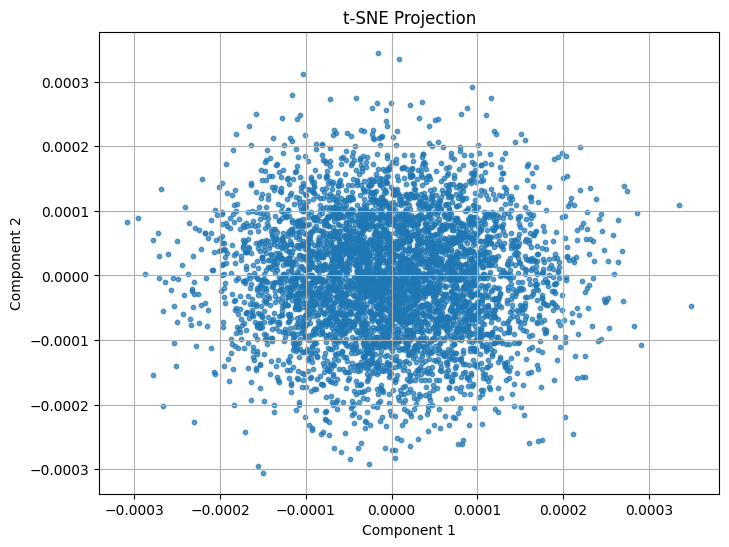

In [5]:
#
X = df.select_dtypes(include=[np.number]).to_numpy()
Y =  tsne(X, n_components=2, n_iter=1, learning_rate=100.0)

plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], s=10, alpha=0.7)
plt.title("t-SNE Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()